https://www.youtube.com/watch?v=nJIEIzF7tDw&list=PLavw5C92dz9Ef4E-1Zi9KfCTXS_IN8gXZ&index=8

## 1. use of CASE on basis of a condition and groupby on cases

https://mode.com/sql-tutorial/sql-case/

### Write a query that counts the number of 300lb+ players for each of the following regions: West Coast (CA, OR, WA), Texas, and Other (everywhere else)

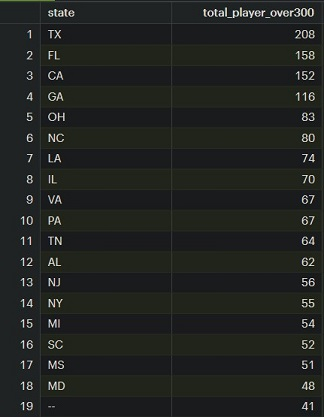

In [ ]:
select CASE 
    WHEN state in ('CA','OR','WA') THEN 'west_coast'
    WHEN state = 'TX' THEN 'texas'
    ELSE 'others' END AS new_state,
count(*) as players_over_300
from benn.college_football_players
where weight >= 300
GROUP BY new_state;

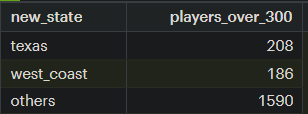

### Write a query that calculates the combined weight of all underclass players (FR/SO) in California as well as the combined weight of all upperclass players (JR/SR) in California.

In [ ]:
select CASE
WHEN year in ('FR','SO') THEN 'underclass'
WHEN year in ('JR','SR') THEN 'upperclass'
END AS class_group,
sum(weight) as total_weight
from benn.college_football_players
where state = 'CA'
GROUP BY 1;

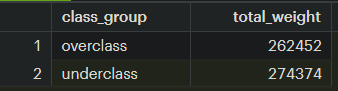

## 2. COUNT with join of 2 tables and groupby

### Count the number of unique companies (don't double-count companies) and unique acquired companies by state. Do not include results for which there is no state data, and order by the number of acquired companies from highest to lowest.

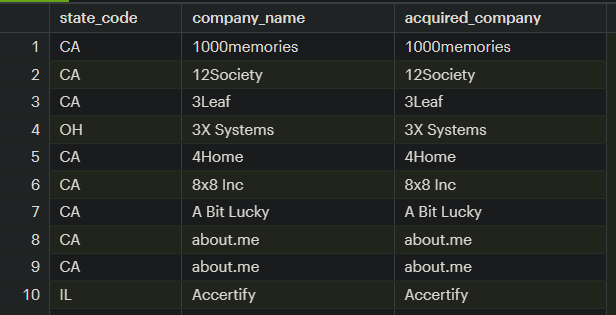

In [ ]:
select state_code, count(DISTINCT companies.name) as company_count , count(DISTINCT acquisition.company_name) as acquisition_count
FROM tutorial.crunchbase_companies companies
LEFT JOIN  tutorial.crunchbase_acquisitions acquisition
ON  companies.permalink = acquisition.company_permalink
GROUP BY state_code
having state_code IS NOT NULL 
ORDER BY 3 DESC;

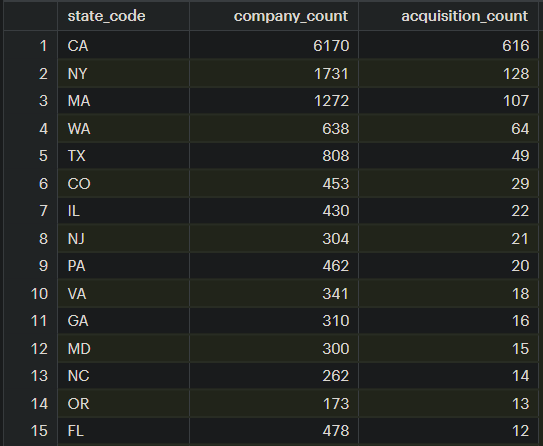

## 3. Groupby with cases and distinct values
https://mode.com/sql-tutorial/sql-joins-where-vs-on/

### Write a query that lists investors based on the number of companies in which they are invested. Include a row for companies with no investor, and order from most companies to least.

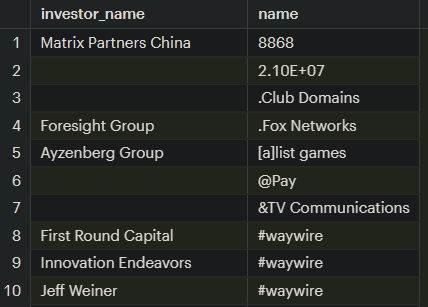

In [ ]:
select  CASE
WHEN investment.investor_name IS NULL then 'No_investor'
ELSE investment.investor_name
END AS companies_invested_in,
investment.investor_name as investor_name, count(DISTINCT companies.name) as distinct_companies_invested
FROM tutorial.crunchbase_investments investment
RIGHT JOIN   tutorial.crunchbase_companies companies
ON  investment.company_permalink = companies.permalink
group by investor_name
order by distinct_companies_invested desc;

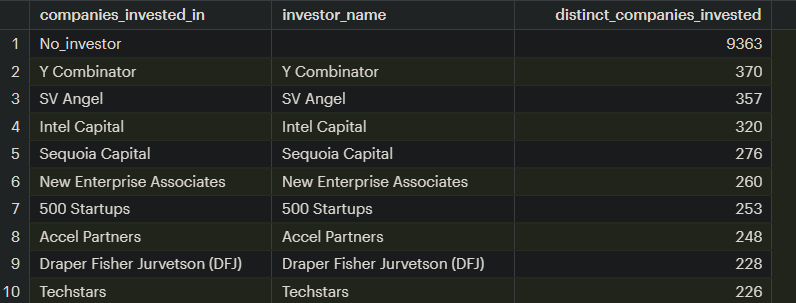

## 4. Full outer join with count of 3 different tables

https://mode.com/sql-tutorial/sql-full-outer-join/

### Write a query that joins tutorial.crunchbase_companies and tutorial.crunchbase_investments_part1 using a FULL JOIN. Count up the number of rows that are matched/unmatched .

In [ ]:
SELECT COUNT(CASE WHEN companies.permalink IS NOT NULL AND investments.company_permalink IS NULL THEN companies.permalink 
             ELSE NULL END) AS companies_only,
       COUNT(CASE WHEN companies.permalink IS NOT NULL AND investments.company_permalink IS NOT NULL THEN companies.permalink
             ELSE NULL END) AS both_tables,
       COUNT(CASE WHEN companies.permalink IS NULL AND investments.company_permalink IS NOT NULL THEN investments.company_permalink
             ELSE NULL END) AS investments_only
  FROM tutorial.crunchbase_companies companies
  FULL JOIN tutorial.crunchbase_investments_part1 investments
    ON companies.permalink = investments.company_permalink

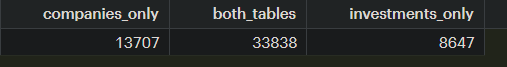

## 5. creating cases on new dataset created by UNION ALL 

https://mode.com/sql-tutorial/sql-union/


In [ ]:
select *,
CASE
WHEN company_name like 'T%' THEN 'dataset1'
ELSE 'dataset2' END AS soure
from (select company_permalink, company_name, investor_name
from tutorial.crunchbase_investments_part1
where company_name like 'T%'
UNION ALL
SELECT company_permalink, company_name, investor_name
from tutorial.crunchbase_investments_part2 investment
where company_name like 'M%') temptable;

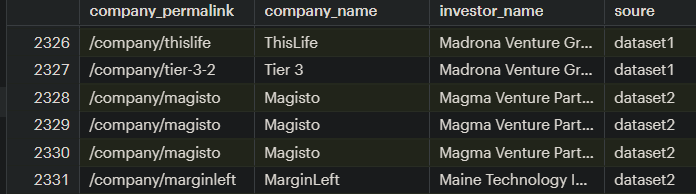

## 6. <span class="mark">REGEX and String slicing in sql</span>

### Query the list of CITY names starting with vowels (i.e., a, e, i, o, or u) from STATION. Your result cannot contain duplicates.

https://www.hackerrank.com/challenges/weather-observation-station-6/problem?isFullScreen=true

In [ ]:
SELECT DISTINCT CITY
FROM STATION
WHERE CITY REGEXP '^[aeiouAEIOU].*';

#### OR 

In [ ]:
SELECT DISTINCT CITY from STATION
where (CITY like 'a%')
OR (CITY like 'e%')
OR (CITY like 'i%')
OR (CITY like 'o%')
OR (CITY like 'u%');

#### OR

In [ ]:
SELECT DISTINCT CITY
FROM STATION
WHERE LEFT(CITY, 1) IN ('A', 'E', 'I', 'O', 'U', 'a', 'e', 'i', 'o', 'u');

### STARTS AND ENDS WITH (a,e,i,o,u)

In [ ]:
SELECT DISTINCT CITY FROM STATION
WHERE LEFT(CITY,1) IN ('A','E','I','O','U','a','e','i','o','u') 
AND 
RIGHT(CITY,1) in ('A','E','I','O','U','a','e','i','o','u');

## 7. Sum of Triangle using CASES
https://www.hackerrank.com/challenges/what-type-of-triangle/problem?isFullScreen=true

In [ ]:
SELECT 
CASE
WHEN (TRIANGLES.A + TRIANGLES.B) <= TRIANGLES.C OR
(TRIANGLES.B + TRIANGLES.C) <= TRIANGLES.A OR
(TRIANGLES.A + TRIANGLES.C) <= TRIANGLES.B THEN 'Not A Triangle'
WHEN (TRIANGLES.A = TRIANGLES.B) AND  (TRIANGLES.B = TRIANGLES.C) THEN 'Equilateral'
WHEN (TRIANGLES.A<>TRIANGLES.B) AND (TRIANGLES.B<>TRIANGLES.C)AND (TRIANGLES.C<>TRIANGLES.A) THEN 'Scalene'
WHEN (TRIANGLES.A=TRIANGLES.B) AND (TRIANGLES.A!=TRIANGLES.C) or 
(TRIANGLES.A=TRIANGLES.C) AND (TRIANGLES.A!=TRIANGLES.B) or
(TRIANGLES.B=TRIANGLES.C) AND (TRIANGLES.B!=TRIANGLES.A)  THEN 'Isosceles'
END
from TRIANGLES

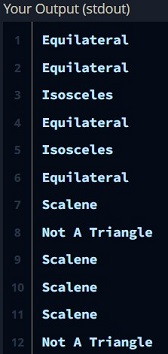

## 8. PADDING in SQL

https://www.hackerrank.com/challenges/the-pads/problem?isFullScreen=true

In [ ]:
SELECT CONCAT(NAME,"(",LEFT(OCCUPATION,1),")") FROM OCCUPATIONS
ORDER BY NAME;

SELECT CONCAT('There are a total of ',COUNT(OCCUPATION),' ',LOWER(OCCUPATION),'s.')
FROM OCCUPATIONS
GROUP BY OCCUPATION
ORDER BY COUNT(OCCUPATION),OCCUPATION;

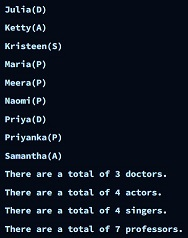

## 9. SUBQUERY USING ANY

### Query the Western Longitude (LONG_W) for the largest Northern Latitude (LAT_N) in STATION that is less than 137.2345. Round your answer to  decimal places.
https://www.hackerrank.com/challenges/weather-observation-station-17/problem?isFullScreen=true

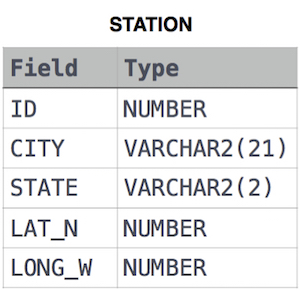

In [ ]:
SELECT ROUND(LONG_W,4)
FROM STATION
WHERE LAT_N = ANY (
  SELECT MAX(LAT_N)
  FROM STATION
  WHERE LAT_N < 137.2345
);

### Query the Western Longitude (LONG_W)where the smallest Northern Latitude (LAT_N) in STATION is greater than 38.7780. Round your answer to  decimal places.

In [ ]:
SELECT ROUND(LONG_W,4) FROM STATION
WHERE LAT_N = ANY(
SELECT MIN(LAT_N) FROM STATION
WHERE LAT_N > 38.7780)

#### OR

In [ ]:
SELECT ROUND(LONG_W,4) FROM STATION
WHERE LAT_N > 38.7780
ORDER BY LAT_N
LIMIT 1;

## 10. Top Earners
https://www.hackerrank.com/challenges/earnings-of-employees/problem?isFullScreen=true

We define an employee's total earnings to be their monthly  salary * months worked, and the maximum total earnings to be the maximum total earnings for any employee in the Employee table. 

Write a query to find the maximum total earnings for all employees as well as the total number of employees who have maximum total earnings. 

Then print these values as  2 space-separated integers.

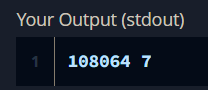

#### OR Simple code:

# 11. Mathematical calculations

https://www.youtube.com/watch?v=kzMZDlvHFak

SELECT model, 
sqrt(resolution_width * resolution_width + resolution_height * resolution_height)/screen_size AS ppi
FROM smartphones;

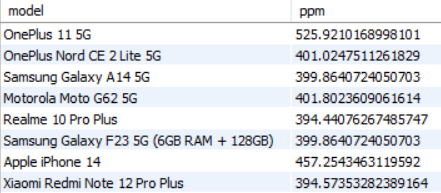

# 12. 3rd and 4th largest:

#### find the phone with 3rd largest battery

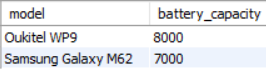

##### LIMIT 2,2 means go to 2nd row and 2 means take the next 2 rows i.e 3rd and 4th after 2nd row.

## 13. Find top 2 most paying customers of each month

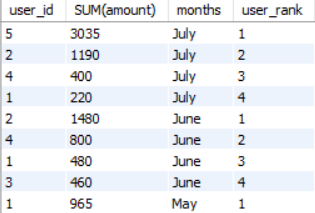

#### NOW Limiting rank to 2 from each month

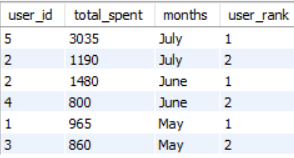

## 14. DENSE RANK() of top 5 batsman from each IPL team

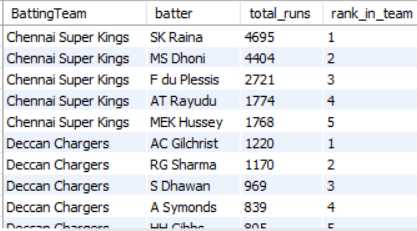

## 15. return n random records

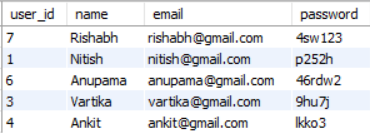

## 16. Use of CTE and joins:

Advance joins - Placements - https://www.hackerrank.com/challenges/placements/problem?isFullScreen=true

- You are given three tables: Students, Friends and Packages. Students contains two columns: ID and Name. Friends contains two columns: ID and Friend_ID (ID of the ONLY best friend). Packages contains two columns: ID and Salary (offered salary in  thousands per month).


- Write a query to output the names of those students whose best friends got offered a higher salary than them. Names must be ordered by the salary amount offered to the best friends. It is guaranteed that no two students got same salary offer.

```sql

with cte as 
    (SELEct s.*,p.salary as own_salary,f.friend_id 
    from students_p as s
    JOIN friends_p as f
    ON s.id = f.id
    JOIN packages_p as p
    ON p.id = s.id)
    
select cte.*,
t2.name,
p.salary as friends_salary 
from cte
JOIN students_p as t2
ON cte.friend_id=t2.id
JOIN packages_p as p
ON cte.friend_id = p.id
ORDER BY id;    
```

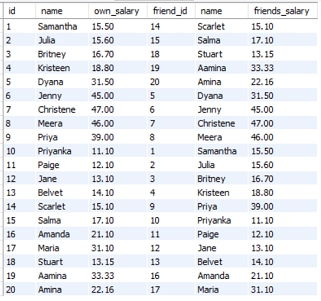


##### adding HAVING clause to get the answer:

```sql
with cte as 
    (SELEct s.*,p.salary as own_salary,f.friend_id 
    from students_p as s
    JOIN friends_p as f
    ON s.id = f.id
    JOIN packages_p as p
    ON p.id = s.id)
    
select cte.*,
t2.name,
p.salary as friends_salary 
from cte
JOIN students_p as t2
ON cte.friend_id=t2.id
JOIN packages_p as p
ON cte.friend_id = p.id
HAVING cte.own_salary > p.salary
 ORDER BY p.salary;
```

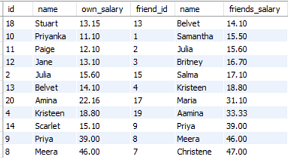

## 17. Symmetric Pair

https://www.hackerrank.com/challenges/symmetric-pairs/problem?isFullScreen=true

Two pairs (X1, Y1) and (X2, Y2) are said to be symmetric pairs if X1 = Y2 and X2 = Y1.


Write a query to output all such symmetric pairs in ascending order by the value of X. List the rows such that X1 ≤ Y1.

```sql
with cte as 
    (select f1.*,
    ROW_NUMBER() OVER(PARTITION BY f1.x,f1.y) as rn
    from functions as f1
    CROSS JOIN functions as f2
    WHERE (f1.x=f2.y AND f2.x=f1.y) AND(f1.x<=f1.y)
    ORDER by f1.x)

select x,y 
from cte 
where (rn=2 AND cte.x=cte.y) OR (cte.x!=cte.y)
```

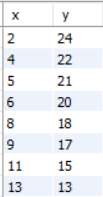

## 18. Top Competitors

https://www.hackerrank.com/challenges/full-score/problem?isFullScreen=true

Julia just finished conducting a coding contest, and she needs your help assembling the leaderboard! 


Write a query to print the respective hacker_id and name of hackers who achieved full scores for more than one challenge. 

Order your output in descending order by the total number of challenges in which the hacker earned a full score. 


If more than one hacker received full scores in same number of challenges, then sort them by ascending hacker_id.

```sql
SELECT submissions.hacker_id, hackers.name
FROM submissions
JOIN hackers ON submissions.hacker_id = hackers.hacker_id
JOIN challenges ON submissions.challenge_id = challenges.challenge_id
JOIN difficulty ON challenges.difficulty_level = difficulty.difficulty_level
WHERE submissions.score = difficulty.score
GROUP BY hacker_id, name
HAVING COUNT(*) > 1
ORDER BY COUNT(*) DESC, hacker_id ASC
```

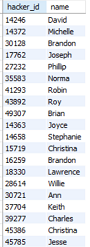

## 19. Challenges - (very confusing question)

https://www.hackerrank.com/challenges/challenges/problem

Julia asked her students to create some coding challenges. Write a query to print the hacker_id, name, and the total number of challenges created by each student. 


Sort your results by the total number of challenges in descending order. 

If more than one student created the same number of challenges, then sort the result by hacker_id. 

If more than one student created the same number of challenges and the count is less than the maximum number of challenges created, then exclude those students from the result.

```sql
with cte as 
    (select c.hacker_id,h.name,
    COUNT(*) as c_created
    from challenges2 as c
    JOIN hackers2 as h
    ON c.hacker_id = h.hacker_id
    GROUP BY c.hacker_id,h.name),

cte2 as 
    (select *,
    COUNT(*) over(PARTITION BY cte.c_created) as total_count
    from cte
    ORDER BY c_created DESC)

select 
    cte2.hacker_id, 
    cte2.name, 
    cte2.c_created 
    from cte2
    WHERE (cte2.c_created = (select MAX(cte2.c_created) from cte2)) 
           OR cte2.total_count = 1
    ORDER BY c_created DESC,hacker_id;
```

#### final result:


|   id   |     name     | counter |
|------- |--------------|---------|
|  5120  |     Julia    |   50    |
| 18425  |     Anna     |   50    |
| 20023  |    Brian     |   50    |
| 33625  |    Jason     |   50    |
| 41805  |  Benjamin    |   50    |
| 52462  |   Nicholas   |   50    |
| 64036  |    Craig     |   50    |
| 69471  |   Michelle   |   50    |
| 77173  |   Mildred    |   50    |
| 94278  |   Dennis     |   50    |
| 96009  |   Russell    |   50    |
| 96716  |    Emily     |   50    |
| 72866  |   Eugene     |   42    |
| 37068  |   Patrick    |   41    |
| 12766  |  Jacqueline  |   40    |
| 86280  |   Beverly    |   37    |
| 19835  |    Joyce     |   36    |
| 38316  |   Walter     |   35    |
| 29483  |   Jeffrey    |   34    |
| 23428  |   Arthur     |   33    |
| 95437  |    George    |   32    |
| 46963  |   Barbara    |   31    |
| 87524  |    Norma     |   30    |
| 84085  |    Johnny    |   29    |
| 39582  |    Maria     |   28    |
| 65843  |   Thomas     |   27    |
| 5443   |    Paul      |   26    |
| 52965  |    Bobby     |   25    |
| 77105  |    Diana     |   24    |
| 33787  |    Susan     |   23    |
| 45855  |  Clarence    |   22    |
| 33177  |    Jane      |   21    |
| 7302   |   Victor     |   20    |
| 54461  |    Janet     |   19    |
| 42277  |    Sara      |   18    |
| 99388  |    Mary      |   16    |
| 31426  |   Carlos     |   15    |
| 95010  |   Victor     |   14    |
| 27071  |   Gerald     |   10    |
| 90267  |   Edward     |    9    |
| 72609  |    Bobby     |    8    |


##### students with top marks  + the students who are alone in their group (if duplicates present, remove the entire group)

## Contest Leaderboard

https://www.hackerrank.com/challenges/contest-leaderboard/problem

The total score of a hacker is the sum of their maximum scores for all of the challenges. Write a query to print the hacker_id, name, and total score of the hackers ordered by the descending score. 

If more than one hacker achieved the same total score, then sort the result by ascending hacker_id. Exclude all hackers with a total score of  0 from your result.

###  efficient one:


```sql
SELECT hacker_id, name, SUM(max_score) as total_score
FROM (
    SELECT
        h.hacker_id,
        h.name,
        s.challenge_id,
        MAX(s.score) as max_score
    FROM hackers3 as h
    JOIN submissions2 as s ON h.hacker_id = s.hacker_id
    GROUP BY h.hacker_id, h.name, s.challenge_id
) AS max_scores
GROUP BY hacker_id, name
HAVING total_score > 0
ORDER BY total_score DESC, hacker_id ASC;
```

### OR using cte (not efficient)

```sql
with cte as (select hackers.hacker_id,hackers.name,submissions.challenge_id,submissions.submission_id,submissions.score,
             ROW_NUMBER() OVER(PARTITION BY hackers.hacker_id,submissions.challenge_id ORDER BY submissions.score DESC) as rank_score
              from hackers3 as hackers
              JOIN submissions2 as submissions
              ON hackers.hacker_id = submissions.hacker_id),


              
cte2 as (select hacker_id,name,score,challenge_id from cte
WHERE rank_score = 1)

select hacker_id,name, 
sum(score)
from cte2
GROUP BY hacker_id,name
HAVING sum(score)>0
ORDER BY sum(score) DESC, hacker_id ASC;
```

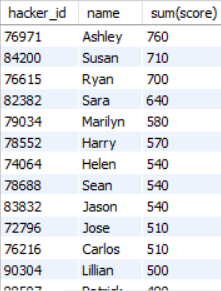

# 20. SQL Project Planning

https://www.hackerrank.com/challenges/sql-projects/problem?isFullScreen=true

If the End_Date of the tasks are consecutive, then they are part of the same project. Samantha is interested in finding the total number of different projects completed.

Write a query to output the start and end dates of projects listed by the number of days it took to complete the project in ascending order. If there is more than one project that have the same number of completion days, then order by the start date of the project.